# **Industrial copper**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
import numpy as np
from scipy.stats import norm, skew


In [ ]:
df = pd.read_csv("/content/Copper_Set.csv")
df.head()

<ipython-input-23-af65ff6af436>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
# formating date columns from float to date
df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['delivery date']=pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date

# converting dtype date columns to datatime
df['item_date']=pd.to_datetime(df['item_date'])
df['delivery date']=pd.to_datetime(df['delivery date'])

In [ ]:
# Calculating time taken to delivery in days
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [ ]:
# converting values in the quantity tons to float
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')

In [ ]:
df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   181671 non-null  object        
 1   item_date            181670 non-null  datetime64[ns]
 2   quantity tons        181672 non-null  float64       
 3   customer             181672 non-null  float64       
 4   country              181645 non-null  float64       
 5   status               181671 non-null  object        
 6   item type            181673 non-null  object        
 7   application          181649 non-null  float64       
 8   thickness            181672 non-null  float64       
 9   width                181673 non-null  float64       
 10  material_ref         103754 non-null  object        
 11  product_ref          181673 non-null  int64         
 12  delivery date        181670 non-null  datetime64[ns]
 13  selling_price 

In [ ]:
df.isna().sum()

,0
id,2
item_date,3
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
df['id'].nunique()

181671

In [ ]:
# id has unique values so either index it or drop, here dropping it.
df.drop(['id'], axis=1, inplace=True)

In [ ]:
# dropping material_ref column because it has huge null value it'll affect the model
df.drop(['material_ref'], axis=1, inplace=True)

In [ ]:
# check if there is any negative value which is logically not correct
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [ ]:
# converting negative values to postive

df['quantity tons']=df['quantity tons'].apply(lambda x: -1*x if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: -1*x if x<=0 else x)

In [ ]:
# replacing null in categorical column with mode

df['item_date']=df['item_date'].fillna(df['item_date'].mode()[0])
df['status']=df['status'].fillna(df['status'].mode()[0])
df['delivery date']=df['delivery date'].fillna(df['delivery date'].mode()[0])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181673 non-null  datetime64[ns]
 1   quantity tons        181672 non-null  float64       
 2   customer             181672 non-null  float64       
 3   country              181645 non-null  float64       
 4   status               181673 non-null  object        
 5   item type            181673 non-null  object        
 6   application          181649 non-null  float64       
 7   thickness            181672 non-null  float64       
 8   width                181673 non-null  float64       
 9   product_ref          181673 non-null  int64         
 10  delivery date        181673 non-null  datetime64[ns]
 11  selling_price        181672 non-null  float64       
 12  delivery_time_taken  181667 non-null  float64       
dtypes: datetime64[

In [ ]:
# replacing null in continuous column with mean

df['quantity tons'].fillna(df['quantity tons'].mean(), inplace=True)
df['customer'].fillna(df['customer'].mean(), inplace=True)
df['country'].fillna(df['country'].mean(), inplace=True)
df['application'].fillna(df['application'].mean(), inplace=True)
df['thickness'].fillna(df['thickness'].mean(), inplace=True)
df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)
df['delivery_time_taken'].fillna(df['delivery_time_taken'].mean(), inplace=True)

In [ ]:
df.isna().sum()

,0
item_date,0
quantity tons,0
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0


In [ ]:
df.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,91.0


In [ ]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
# treating categorical columns by encoding, since we need status column for classifier treat them with map method

df['status']=df['status'].map({'Lost':0,'Won':1,'Draft':2,'To be approved':3,'Not lost for AM':4,'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['item type']=LabelEncoder().fit_transform(df['item type'])
df['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [ ]:
df.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,1,5,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,91.0


In [ ]:
df.drop(['item_date', 'delivery date'], axis=1, inplace=True)

In [ ]:
df.to_csv('industrial_preprocessed.csv', index=False)

In [ ]:
# statistical analysis and skewness of the data

In [ ]:
df.corr()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,-0.000031,-0.001530,0.004965,-0.002439,-0.001956,-0.000640,-0.000428,-0.001086,-0.000010,0.000704
customer,-0.000031,1.000000,0.000345,0.004775,-0.010901,0.000004,0.009589,0.009203,-0.007716,-0.000053,-0.001515
country,-0.001530,0.000345,1.000000,-0.028853,0.129940,-0.019350,-0.019579,0.055293,-0.147384,0.002993,-0.240438
status,0.004965,0.004775,-0.028853,1.000000,-0.064604,0.085843,-0.032165,-0.050531,-0.008033,0.005463,0.031720
item type,-0.002439,-0.010901,0.129940,-0.064604,1.000000,0.169056,-0.026079,-0.092459,-0.089501,-0.005073,-0.142578
application,-0.001956,0.000004,-0.019350,0.085843,0.169056,1.000000,-0.059468,-0.204421,-0.131839,0.001462,-0.167833
thickness,-0.000640,0.009589,-0.019579,-0.032165,-0.026079,-0.059468,1.000000,0.161714,0.038082,-0.001130,0.031179
width,-0.000428,0.009203,0.055293,-0.050531,-0.092459,-0.204421,0.161714,1.000000,-0.034460,0.000583,0.039319
product_ref,-0.001086,-0.007716,-0.147384,-0.008033,-0.089501,-0.131839,0.038082,-0.034460,1.000000,0.002118,0.161785
selling_price,-0.000010,-0.000053,0.002993,0.005463,-0.005073,0.001462,-0.001130,0.000583,0.002118,1.000000,0.000930


<Axes: >

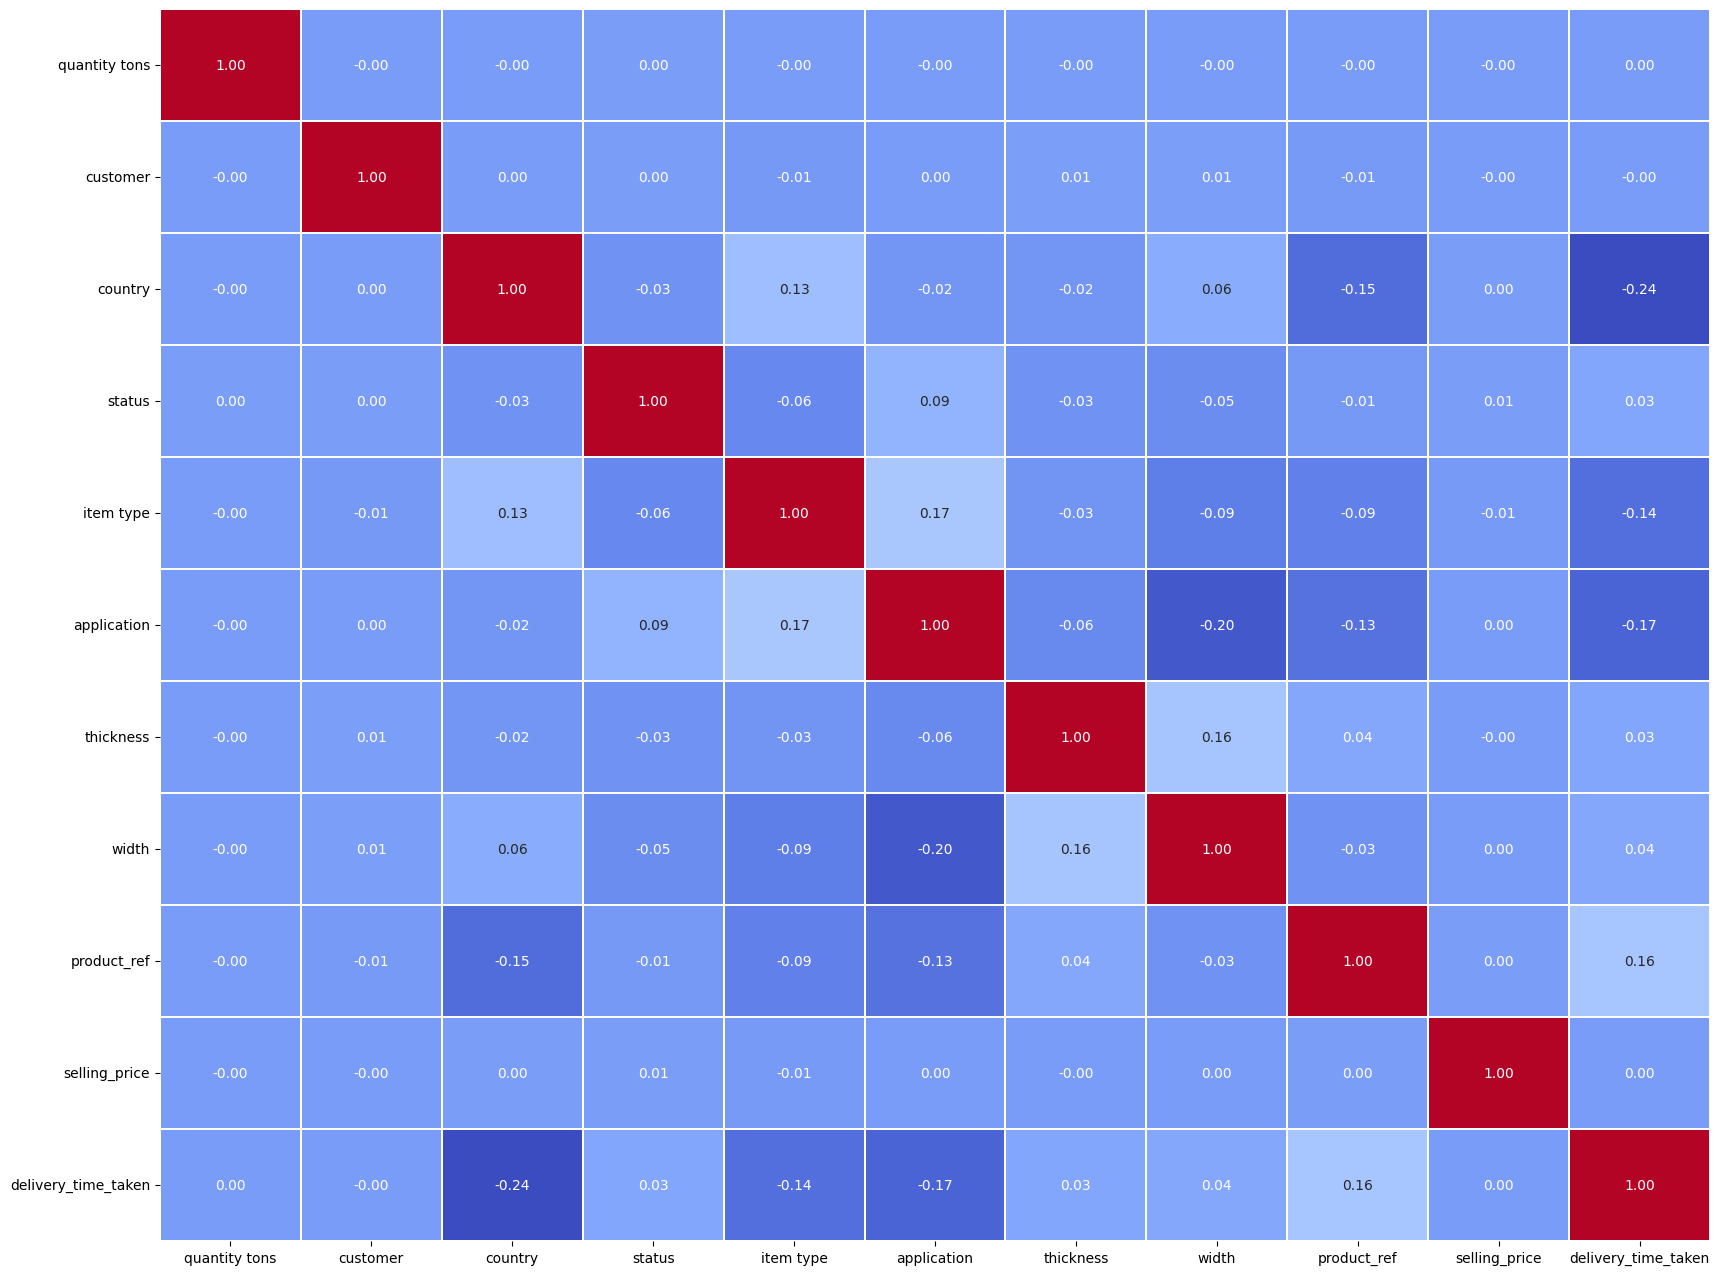

In [ ]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [ ]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'delivery_time_taken'],
      dtype='object')

In [ ]:
con=['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref','selling_price','delivery_time_taken']

In [ ]:
for i in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref','selling_price','delivery_time_taken']:
    print(f'skewness of {i} = {skew(df[i])}')

skewness of quantity tons = 424.6873099262266
skewness of customer = 86.984590056198
skewness of country = 0.7536463842839621
skewness of application = 0.7244009800031509
skewness of thickness = 303.44512882706977
skewness of width = 0.37459367901082125
skewness of product_ref = 1.0152071910463223
skewness of selling_price = 301.38559963329897
skewness of delivery_time_taken = 0.4697225411300922


In [ ]:
def chart(column):
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  sns.histplot(data= df,x=column,kde=True,bins=30,color='red')

  plt.subplot(1,2,2)
  sns.boxplot(df[column])
  plt.show

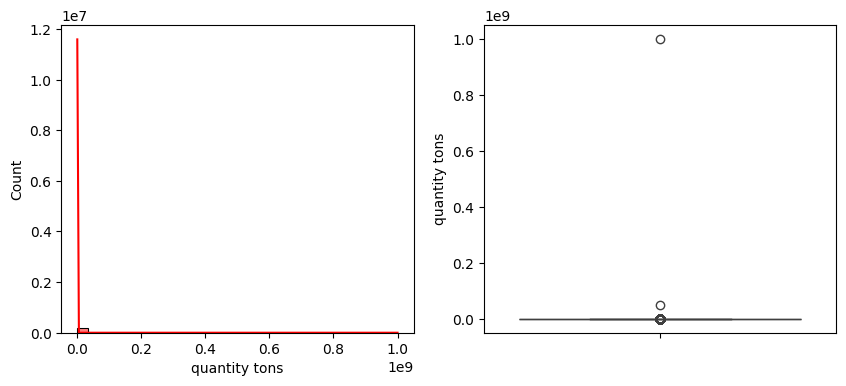

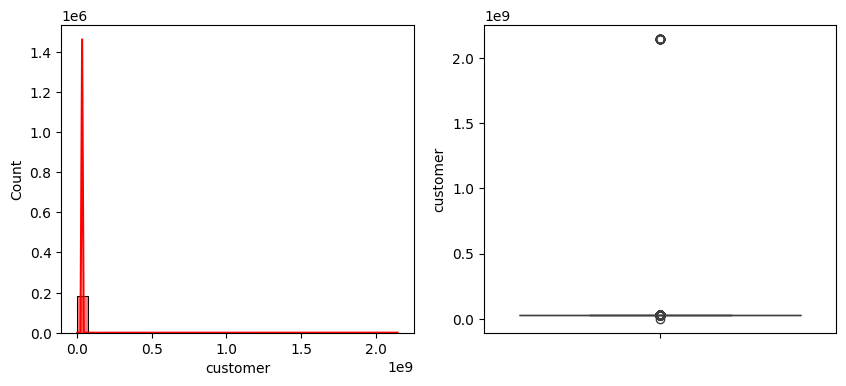

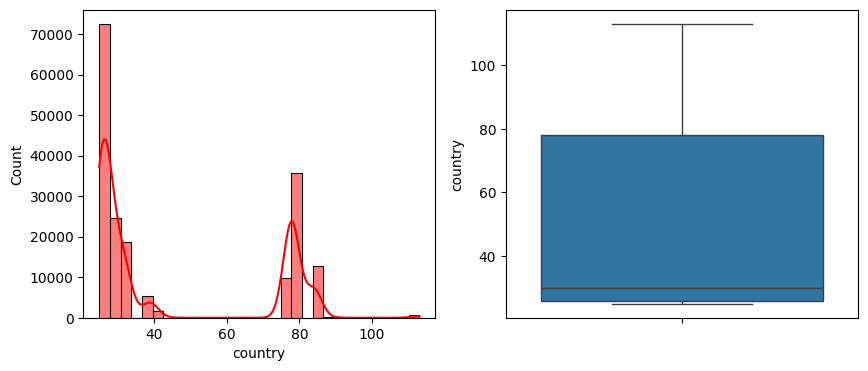

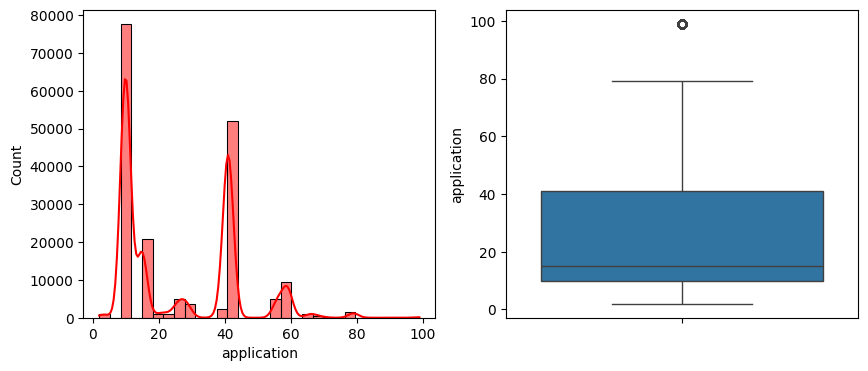

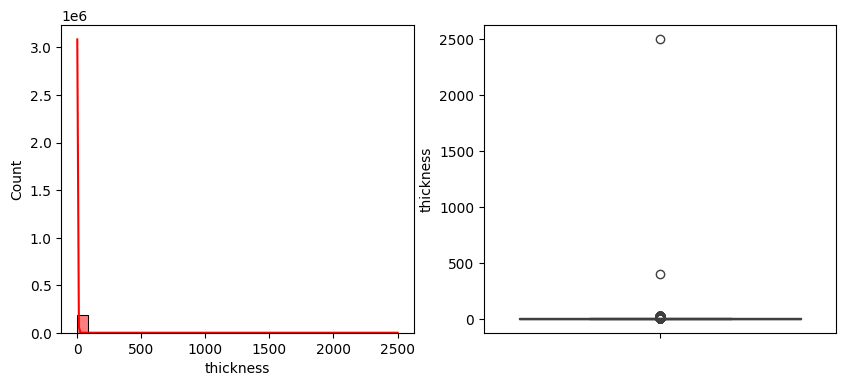

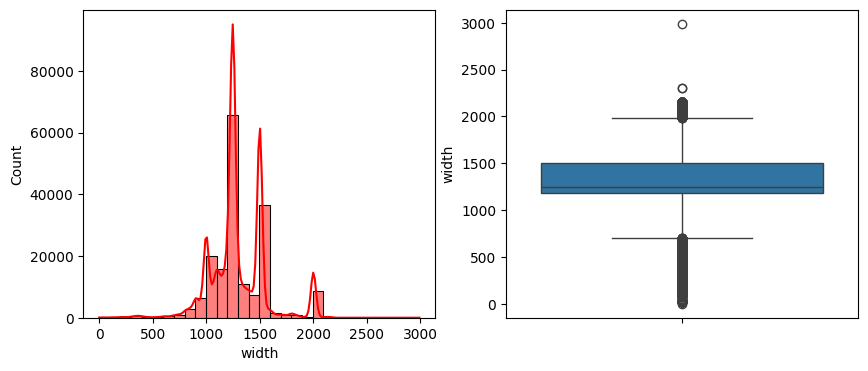

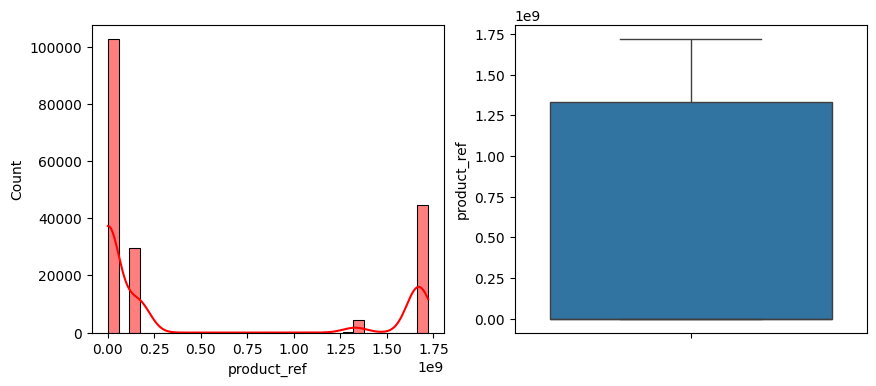

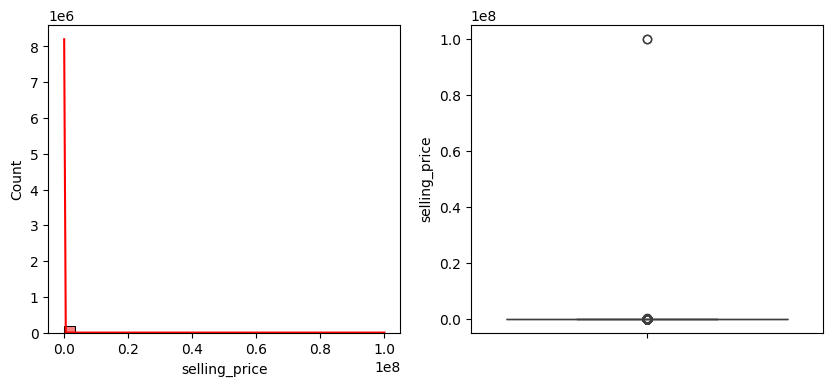

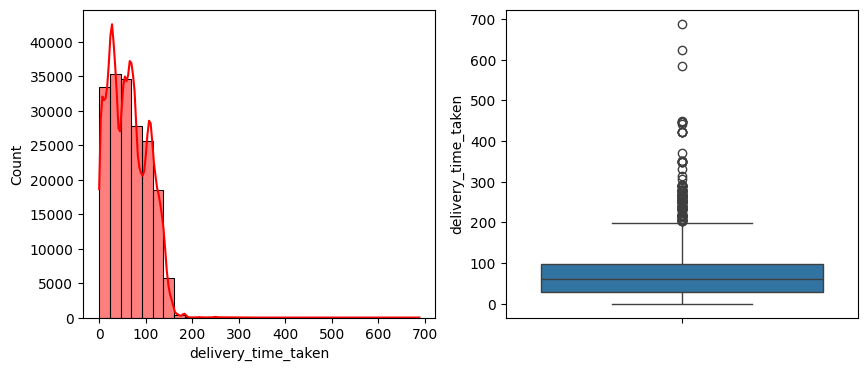

In [ ]:
for i in con:
  chart(i)

In [ ]:
df["quantity tons_modified"]=stats.boxcox(df["quantity tons"],lmbda=0)
df["thickness modified"]=stats.boxcox(df["thickness"],lmbda=0)
df["selling_price modified"]=stats.boxcox(df["selling_price"],lmbda=0)

In [ ]:
print(df['selling_price'].skew())

301.3880880777512


In [ ]:
print(df['quantity tons_modified'].skew())
print(df['thickness modified'].skew())
print(df['selling_price modified'].skew())

-0.06846424168179488
0.351426668454226
292.3528293105072


In [ ]:
df["selling_price modified"].describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,selling_price modified
count,1.816730e+05
mean,-inf
std,NaN
min,-inf
25%,6.505784e+00
50%,6.699500e+00
75%,6.859615e+00
max,1.842069e+01


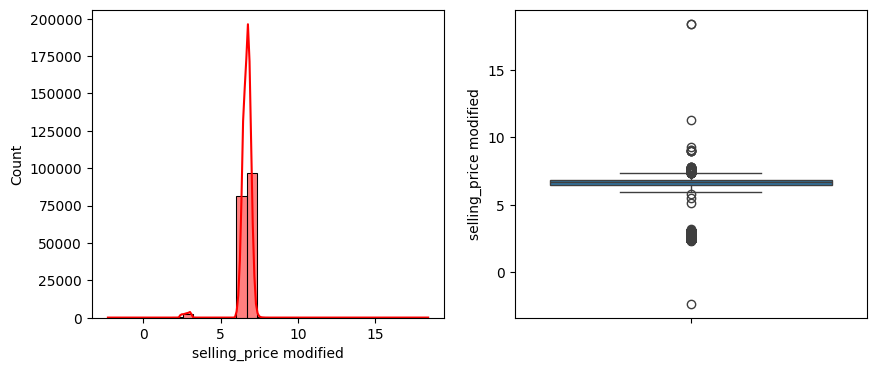

In [ ]:
chart("selling_price modified")

In [ ]:
df.drop(columns=['quantity tons','thickness','selling_price'],inplace=True)
df.head(1)

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_modified,thickness modified,selling_price modified
0,30156308.0,28.0,1,5,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931


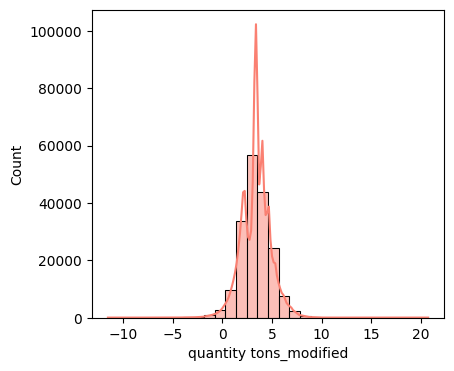

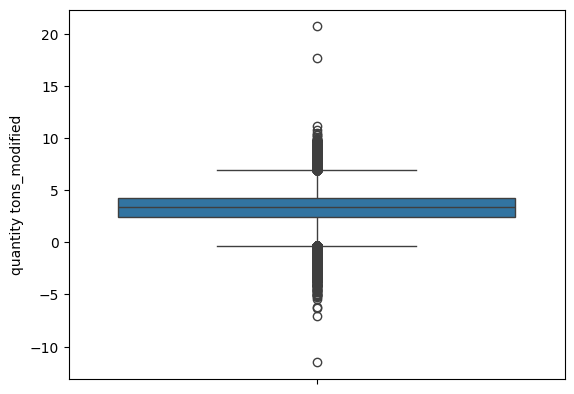

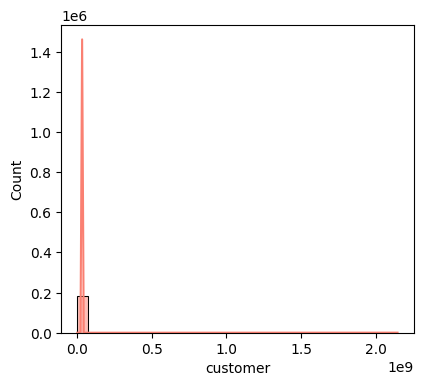

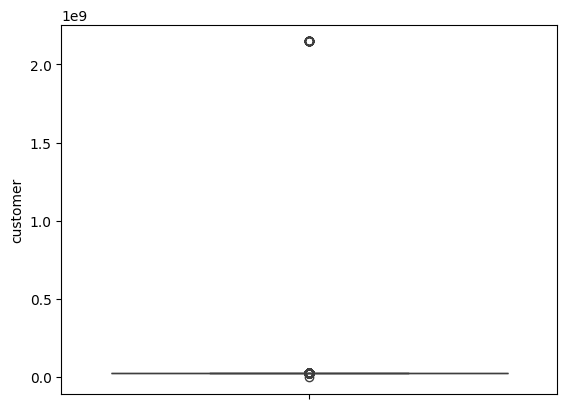

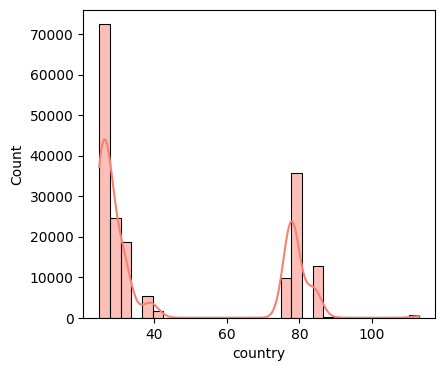

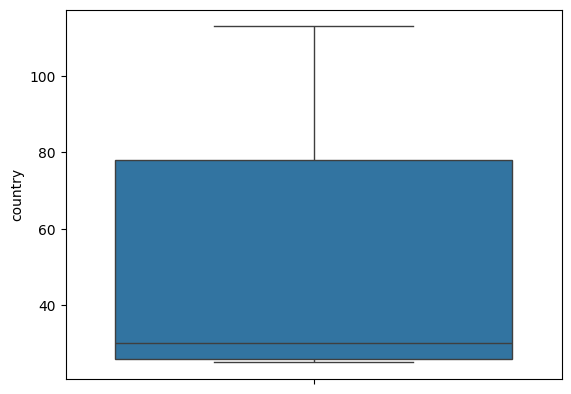

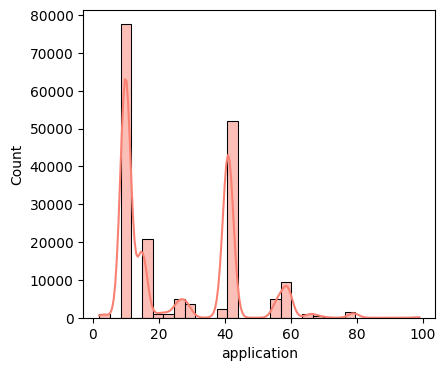

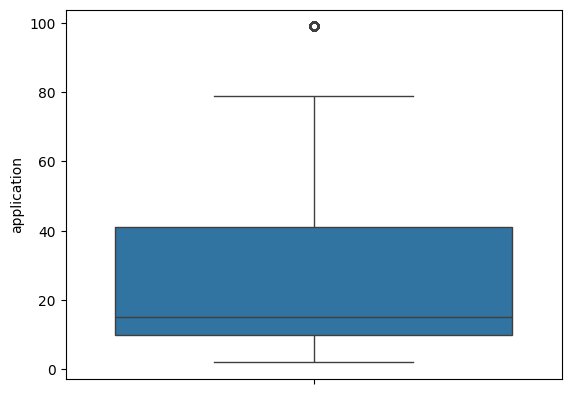

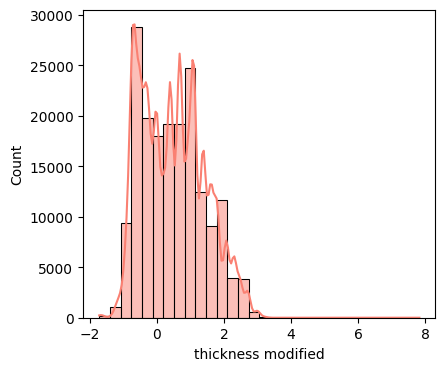

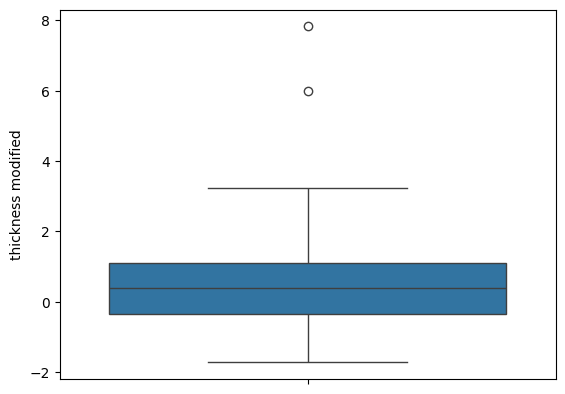

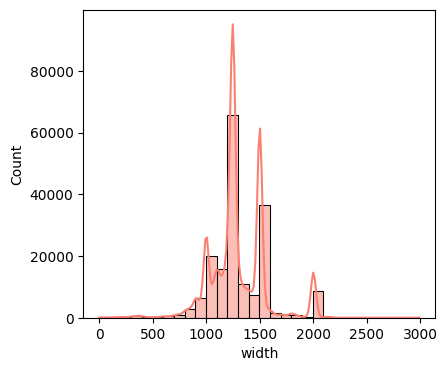

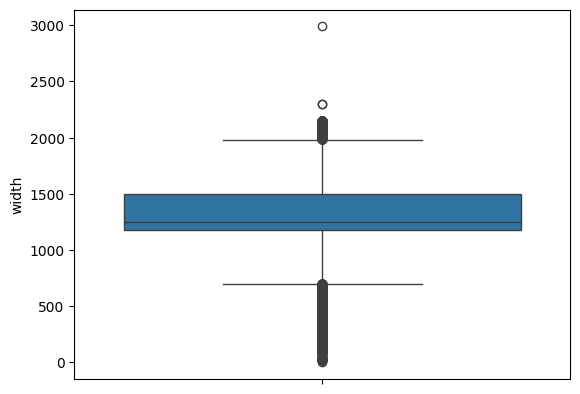

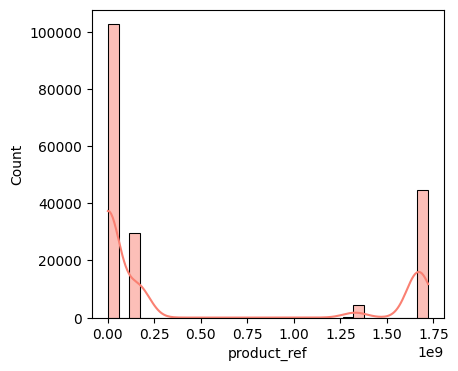

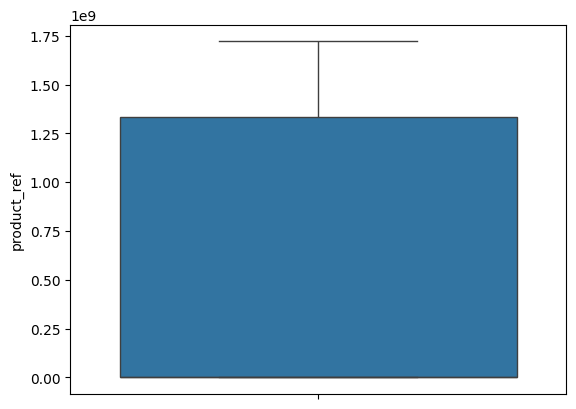

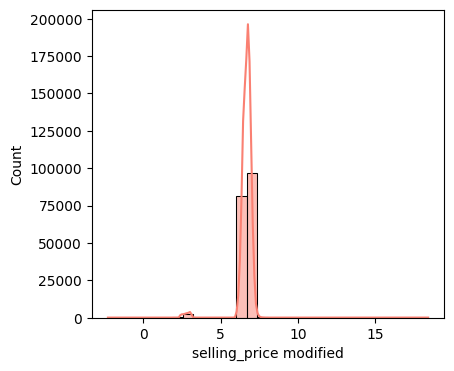

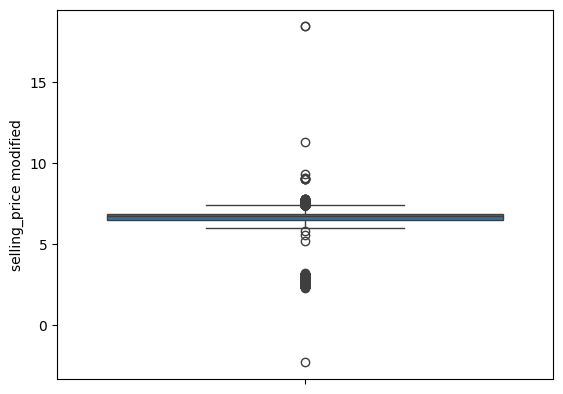

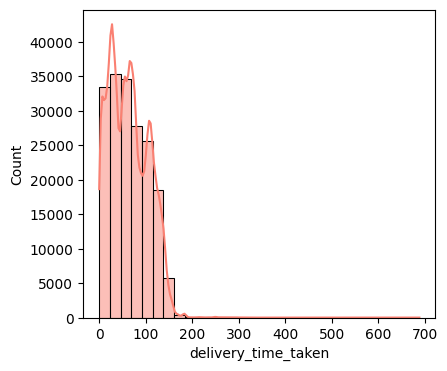

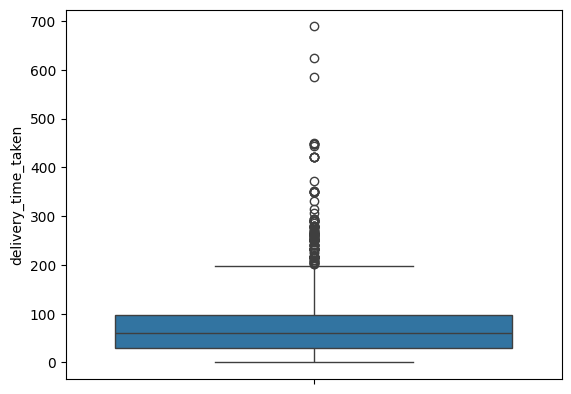

In [ ]:
# charts after log transform
for i in ['quantity tons_modified', 'customer', 'country', 'application', 'thickness modified', 'width', 'product_ref','selling_price modified','delivery_time_taken']:
  chart(i)

In [ ]:
# function to remove outliers using the IQR method
def outliers(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

In [ ]:
continous_column=['quantity tons_modified', 'thickness modified', 'width','selling_price modified']
for col in continous_column:
    df=outliers(df,col)

In [ ]:
df.shape

(163944, 11)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head(1)

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_modified,thickness modified,selling_price modified
0,30156308.0,28.0,1,5,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931


<Axes: >

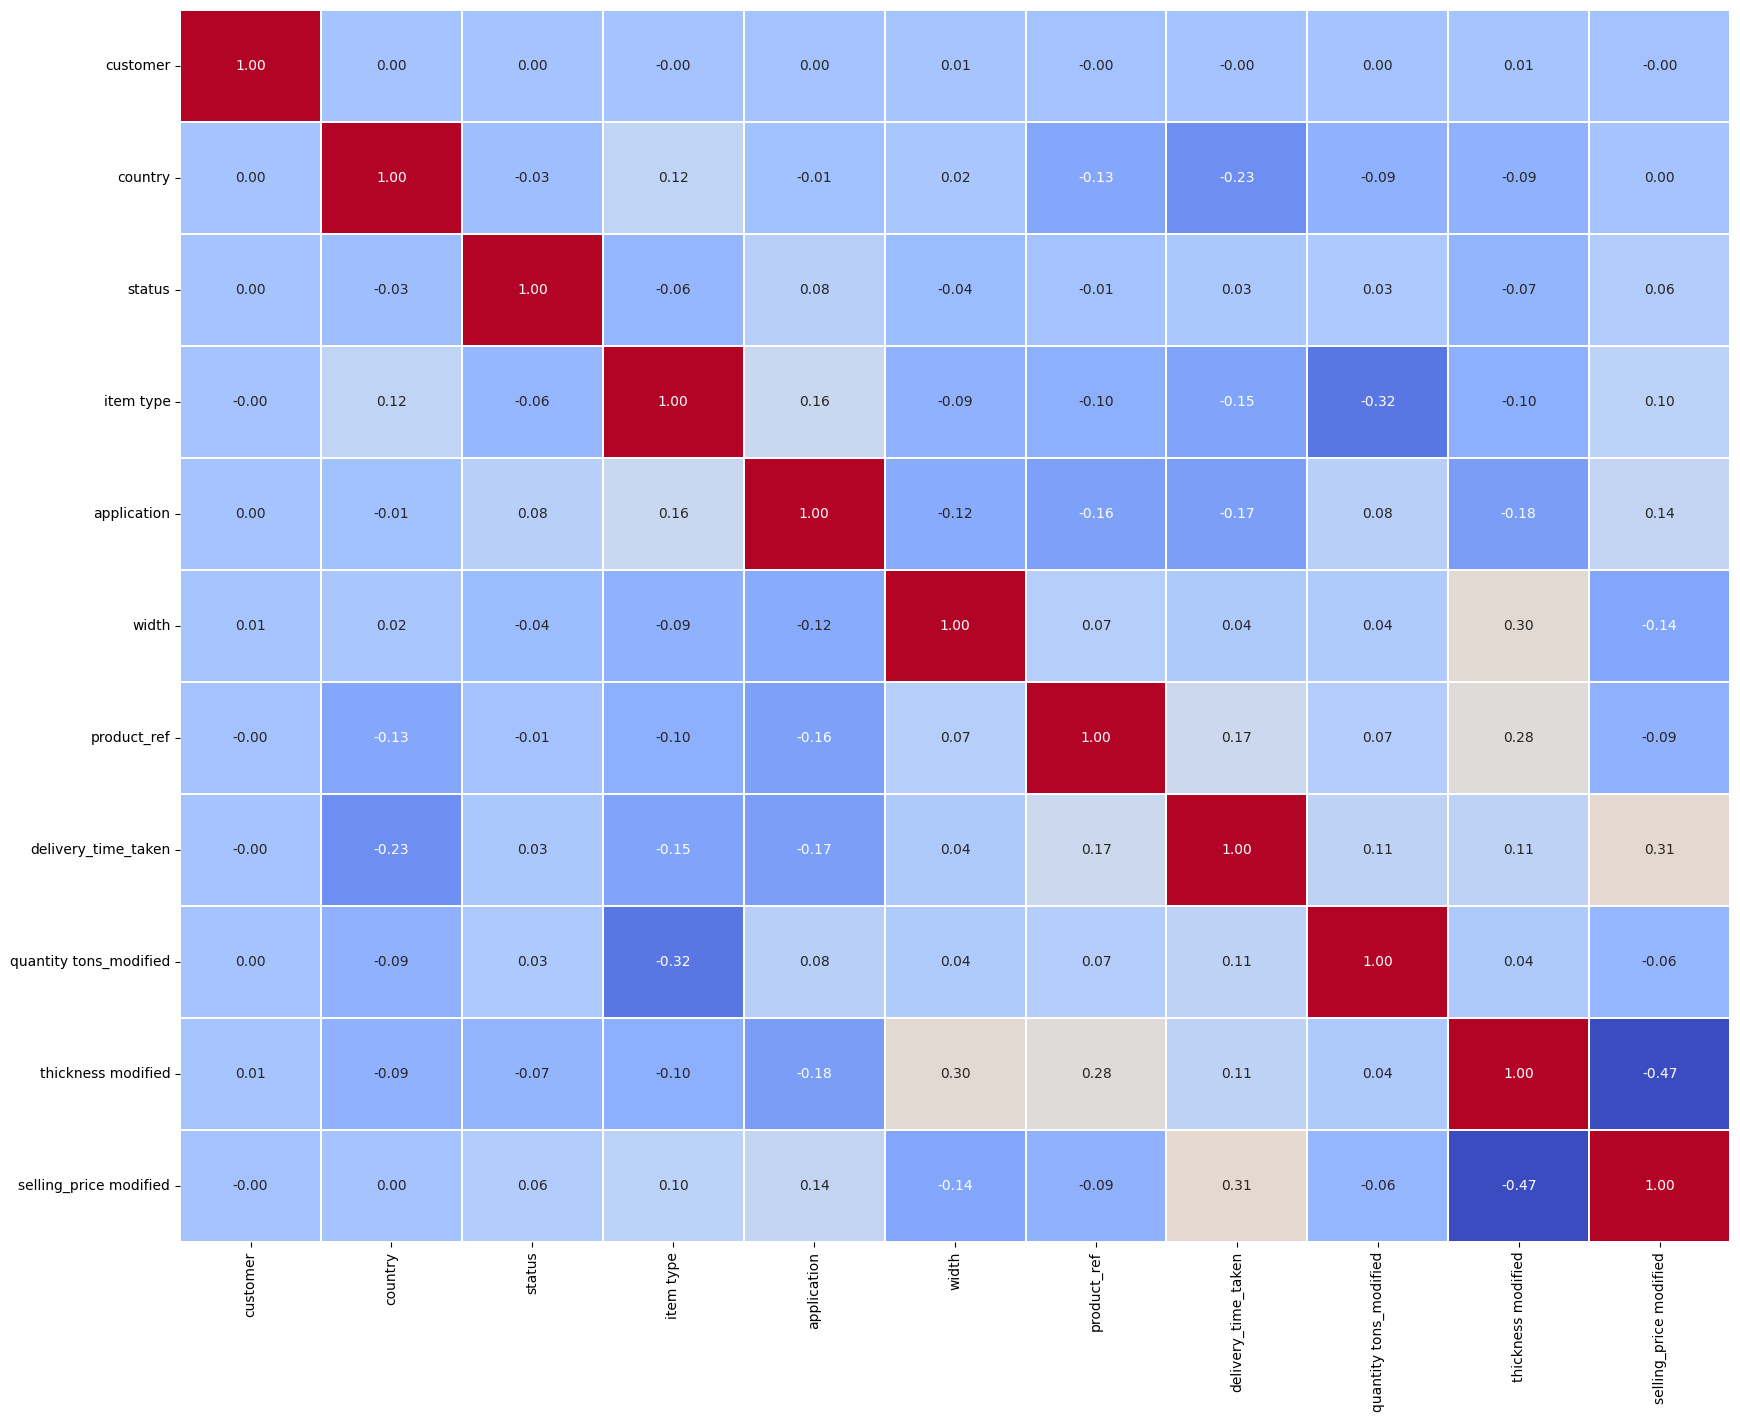

In [ ]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [ ]:
#Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [ ]:
x=df.drop('selling_price modified', axis=1)
y = df['selling_price modified']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  data ={'Model_Name': name,
         'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
         'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
         'R2_Score': round(r2_score(y_test, y_predict), 4)}

  res.append(data)

In [ ]:
model_check('DecisionTreeRegressor', DecisionTreeRegressor())

In [ ]:
model_check('LinearRegression', LinearRegression())

In [ ]:
model_check('RandomForestRegressor', RandomForestRegressor())

In [ ]:
model_check('ExtraTreesRegressor', ExtraTreesRegressor())

In [ ]:
model_check('GradientBoostingRegressor', GradientBoostingRegressor())

In [ ]:
model_check('AdaBoost Regressor', AdaBoostRegressor())

In [ ]:
reg_model = pd.DataFrame(res)
reg_model

,Model_Name,Mean_Absolute_Error,Mean_Square_Error,R2_Score
0,DecisionTreeRegressor,0.0514,0.0090,0.8395
1,LinearRegression,0.1505,0.0347,0.3829
2,RandomForestRegressor,0.0439,0.0050,0.9115
3,ExtraTreesRegressor,0.0441,0.0051,0.9093
4,GradientBoostingRegressor,0.1155,0.0206,0.6345
5,AdaBoost Regressor,0.1381,0.0272,0.5169


In [ ]:
# As RandomForest have good R2 score and less MAE, MSE

In [ ]:
#hypertune the model
model= RandomForestRegressor().fit(x_train, y_train)
y_predict= model.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data


{'Mean_Absolute_Error': 0.0438, 'Mean_Square_Error': 0.005, 'R2_Score': 0.9118}

In [ ]:
pickle.dump(model, open('Regression_model', 'wb'))

In [ ]:
#classification model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
classification = df.copy()

In [ ]:
#filter the status column, we need only won and lost values
df_classification= classification[(classification['status']==1) | (classification['status']==0)]
df_classification.shape

(137645, 11)

In [ ]:
x = df_classification.drop('status', axis=1)
y= df_classification['status']

In [ ]:
x.shape, y.shape

((137645, 10), (137645,))

In [ ]:
# before over sampling

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  model_accuracy=accuracy_score(y_test,y_predict)

  data ={'Model_Name': name,
         'accuracy': model_accuracy}

  res.append(data)


In [ ]:
model_check('Desiciontree', DecisionTreeClassifier())

[{'Model_Name': 'Desiciontree', 'accuracy': 0.9471466453558066}]

In [ ]:
model_check('Randomforest', RandomForestClassifier())

[{'Model_Name': 'Desiciontree', 'accuracy': 0.9471466453558066},
 {'Model_Name': 'Randomforest', 'accuracy': 0.9662174434232991}]

In [ ]:
model_check('GradientBoostingClassifier',  GradientBoostingClassifier())

[{'Model_Name': 'Desiciontree', 'accuracy': 0.9471466453558066},
 {'Model_Name': 'Randomforest', 'accuracy': 0.9662174434232991},
 {'Model_Name': 'GradientBoostingClassifier', 'accuracy': 0.8349740273892986}]

In [ ]:
model_check('AdaBoostClassifier',  AdaBoostClassifier())

[{'Model_Name': 'Desiciontree', 'accuracy': 0.9471466453558066},
 {'Model_Name': 'Randomforest', 'accuracy': 0.9662174434232991},
 {'Model_Name': 'GradientBoostingClassifier', 'accuracy': 0.8349740273892986},
 {'Model_Name': 'AdaBoostClassifier', 'accuracy': 0.813614733553707}]

In [ ]:
model_check('ExtraTreesClassifier',  ExtraTreesClassifier())

[{'Model_Name': 'Desiciontree', 'accuracy': 0.9471466453558066},
 {'Model_Name': 'Randomforest', 'accuracy': 0.9662174434232991},
 {'Model_Name': 'GradientBoostingClassifier', 'accuracy': 0.8349740273892986},
 {'Model_Name': 'AdaBoostClassifier', 'accuracy': 0.813614733553707},
 {'Model_Name': 'ExtraTreesClassifier', 'accuracy': 0.9663990700715609}]

In [ ]:
model_df = pd.DataFrame(res)
model_df

,Model_Name,accuracy
0,Desiciontree,0.947147
1,Randomforest,0.966217
2,GradientBoostingClassifier,0.834974
3,AdaBoostClassifier,0.813615
4,ExtraTreesClassifier,0.966399


In [ ]:
# parameter={'n_estimators':[50,100,200],'max_depth':[10,20,30],'min_samples_split':[2,4,6],'min_samples_leaf':[1,2,3]}

# grid_search=GridSearchCV(estimator=ExtraTreesClassifier(random_state=42),param_grid=parameter,cv=5, scoring="accuracy",n_jobs=-1)

# grid_search.fit(x_train,y_train)
# print("Best Score: ", grid_search.best_score_,"Best Parameters: ", grid_search.best_params_)

Best Score:  0.9637382340547151 Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
model= ExtraTreesClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200).fit(x_train, y_train)
y_predict= model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.965708888808166

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 5737,   568],
       [  376, 20848]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6305
           1       0.97      0.98      0.98     21224

    accuracy                           0.97     27529
   macro avg       0.96      0.95      0.95     27529
weighted avg       0.97      0.97      0.97     27529



In [ ]:
model= RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150).fit(x_train, y_train)
y_predict= model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9620037051836245

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 5677,   628],
       [  418, 20806]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6305
           1       0.97      0.98      0.98     21224

    accuracy                           0.96     27529
   macro avg       0.95      0.94      0.95     27529
weighted avg       0.96      0.96      0.96     27529



In [ ]:
# after oversampling

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
x_new,y_new=SMOTETomek().fit_resample(x,y)

In [ ]:
x_new.shape,y_new.shape

((210140, 10), (210140,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [ ]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  model_accuracy=accuracy_score(y_test,y_predict)

  data ={'Model_Name': name,
         'accuracy': model_accuracy}

  res.append(data)

In [ ]:
model_check('Desiciontree', DecisionTreeClassifier())

In [ ]:
model_check('Randomforest', RandomForestClassifier())

In [ ]:
model_check('GradientBoostingClassifier',  GradientBoostingClassifier())

In [ ]:
model_check('AdaBoostClassifier',  AdaBoostClassifier())

In [ ]:
model_check('ExtraTreesClassifier',  ExtraTreesClassifier())

In [ ]:
model_resample = pd.DataFrame(res)
model_resample

,Model_Name,accuracy
0,Desiciontree,0.961692
1,Randomforest,0.979680
2,GradientBoostingClassifier,0.798087
3,AdaBoostClassifier,0.762682
4,ExtraTreesClassifier,0.982369


In [ ]:
# Extratree
model= ExtraTreesClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200).fit(x_train, y_train)
y_predict= model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9790853716569906

In [ ]:
confusion_matrix(y_test,y_predict)

array([[20989,   171],
       [  708, 20160]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21160
           1       0.99      0.97      0.98     20868

    accuracy                           0.98     42028
   macro avg       0.98      0.98      0.98     42028
weighted avg       0.98      0.98      0.98     42028



In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('classification_model', 'wb'))

In [ ]:
#Randomforest

In [ ]:
model= RandomForestClassifier(max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200).fit(x_train, y_train)
y_predict= model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9776339583135053

In [ ]:
confusion_matrix(y_test,y_predict)

array([[20940,   220],
       [  720, 20148]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21160
           1       0.99      0.97      0.98     20868

    accuracy                           0.98     42028
   macro avg       0.98      0.98      0.98     42028
weighted avg       0.98      0.98      0.98     42028



In [ ]:
# Extratree classifier have better precision, recall and confusion matrix
